# Prediction of Key Variables in Wastewater Treatment Plants Using Machine Learning Models

## Notebook developed for WCCI paper case study: <p style="color:blue">Ammonia and Ammonium ($NH_4$).</p>

## Data Source: Benchmark Simulation Model No 2 - BSM2

## Objective: 
<b> Predict value of ammonia and ammonium ($NH_4$) at the exit of the aerobic tank. The data were collected between tanks 2 and 3, and at the exit of tank 5. <b>
    


## Initial Exploratory Data Analysis

Análises estatísticas univariadas e bivariadas com a finalidade de identificar características das séries temporais.

In [1]:
# Load required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load datasets in csv: data at the entrance and exit of the primary clarifier
df_entrada = pd.read_csv('datasets/dado5.csv')
df_saida = pd.read_csv('datasets/dado8.csv')

In [3]:
# # Copy the S_NH4 column from the df_saida table to a target column, and add it to the df_entrada table
df_entrada['S_NH_target'] = df_saida['S_NH']

In [4]:
# Delete 5 dummie variables.
df_entrada.drop(["d1", "d2","d3","dp1","dp2"], axis = 1, inplace = True)

In [5]:
# Dataset created
df_entrada.head()

time        S_I       S_S          X_I        X_S        X_b,h  \
0  0.010417  28.067023  1.268253  1544.857445  57.810141  2263.844807   
1  0.020833  28.080713  1.213295  1566.626941  56.250462  2295.567404   
2  0.031250  28.104926  1.166586  1586.173348  54.871248  2323.879898   
3  0.041667  28.134986  1.128876  1601.166411  53.689564  2345.443738   
4  0.052083  28.166516  1.097790  1612.142341  52.625194  2361.084431   

        X_b,a          X_p       S_0      S_NO      S_NH      S_ND      X_ND  \
0  167.962940   973.899308  0.000169  2.265460  6.981219  0.657996  3.703355   
1  170.409281   988.097528  0.000152  2.451755  6.553976  0.635936  3.633024   
2  172.609877  1000.886581  0.000157  2.658756  6.135189  0.620582  3.559093   
3  174.303302  1010.758250  0.000158  2.853949  5.767598  0.607559  3.488304   
4  175.548443  1018.058063  0.000151  3.028143  5.448274  0.595661  3.422094   

      S_alk          TSS            fr       temp  S_NH_target  
0  5.546914  3756.280981  97627.650656  14.858490     0.141586  
1  5.503489  3807.713712  97056.068164  14.860318     0.123924  
2  5.459704  3853.815714  96395.567674  14.863169     0.118337  
3  5.420912  3889.020948  95747.265846  14.866241     0.111212  
4  5.387443  3914.593854  95149.331497  14.868961     0.106936

In [6]:
# Data types
df_entrada.dtypes 

time           float64
S_I            float64
S_S            float64
X_I            float64
X_S            float64
X_b,h          float64
X_b,a          float64
X_p            float64
S_0            float64
S_NO           float64
S_NH           float64
S_ND           float64
X_ND           float64
S_alk          float64
TSS            float64
fr             float64
temp           float64
S_NH_target    float64
dtype: object

## Statistics

In [7]:
# Dataset statistics
df_entrada.describe()

time           S_I           S_S           X_I           X_S  \
count  58464.000000  58464.000000  58464.000000  58464.000000  58464.000000   
mean     304.505208     28.580862      1.430209   1336.534122     58.173346   
std      175.804660      3.773040      0.562712    220.730613     15.174073   
min        0.010417      8.142678      0.655557    840.901424     22.294508   
25%      152.257813     27.893136      1.044180   1118.804467     45.085363   
50%      304.505208     29.533444      1.356410   1394.164563     57.950717   
75%      456.752604     30.866061      1.674283   1526.336452     69.538110   
max      609.000000     34.730168     12.084407   1737.648859    121.382643   

              X_b,h         X_b,a           X_p           S_0          S_NO  \
count  58464.000000  58464.000000  58464.000000  58464.000000  58464.000000   
mean    2276.770259    157.503937    763.765201      0.000155      3.835564   
std      534.759026     34.576068    103.798696      0.000052      1.809766   
min     1038.138895     84.005438    468.995503      0.000034      0.026893   
25%     1774.792651    123.561272    676.816503      0.000124      2.509902   
50%     2399.695561    165.904618    758.010677      0.000149      3.806137   
75%     2738.426546    187.628681    839.129312      0.000183      5.098299   
max     3284.779705    216.997187   1057.898134      0.000508     10.334202   

               S_NH          S_ND          X_ND         S_alk           TSS  \
count  58464.000000  58464.000000  58464.000000  58464.000000  58464.000000   
mean       7.276064      0.707228      3.653783      5.431105   3444.560149   
std        3.065072      0.182162      0.807898      0.386091    646.844461   
min        1.748111      0.365029      1.606169      4.462790   1974.392952   
25%        4.798353      0.570628      3.031884      5.156016   2801.033183   
50%        6.944790      0.687648      3.593284      5.386066   3635.833793   
75%        9.223233      0.822194      4.170087      5.655404   4007.585627   
max       17.590980      1.800423      7.259230      6.945568   4597.148517   

                  fr          temp   S_NH_target  
count   58464.000000  58464.000000  58464.000000  
mean   103942.233911     14.333348      0.403175  
std      8546.134167      3.402605      0.707896  
min     88188.428439      9.735365      0.058914  
25%     97705.612007     11.065225      0.106600  
50%    102748.865558     13.765047      0.156534  
75%    108449.683146     17.601160      0.333466  
max    143018.234927     20.173931      9.573660

### Correlations

In [13]:
plt.figure(figsize=(16, 10), dpi=1200)
heatmap = sns.heatmap(df_entrada.corr(),annot_kws={"size": 8}, annot=True,vmin=-1, vmax=1,center= 0, cmap='cividis')
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.yticks(rotation = 0) 
plt.tick_params(axis = 'x', labelsize = 14) # x font label size
plt.tick_params(axis = 'y', labelsize = 14) # y font label size
#plt.savefig('corr2.pdf', dpi=500, format='pdf', bbox_inches='tight')

The models will be made with the highest correlations: S_S; X_S; S_O; S_NO; S_NH; S_ND, X_ND, S_alk, TSS

## Prepare the data

### Split data into training and testing sets
<img src="figuras/f3.png" width="500">

In [14]:
df_treino = df_entrada[0:17280] # 180 days for training and testing
df_teste_final = df_entrada[34936:36001] # 10 days (holdout sample) for final test

In [15]:
# Adjust graph size
sns.set(rc={'figure.figsize':(15,8)})

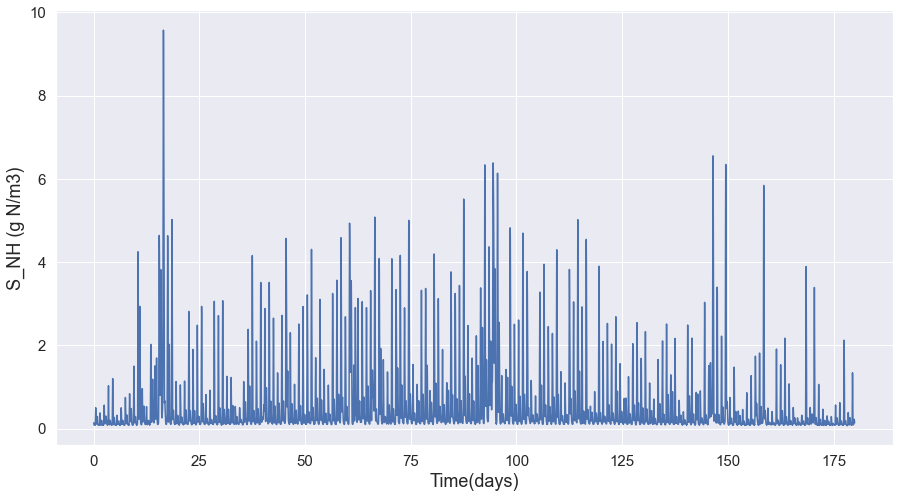

In [16]:
# 180 days for training and testing
p = sns.lineplot(x="time", y="S_NH_target", data=df_treino)
p.set_xlabel("Time(days)", fontsize = 18)
p.set_ylabel("S_NH (g N/m3)", fontsize = 18)
p.tick_params(labelsize=15)

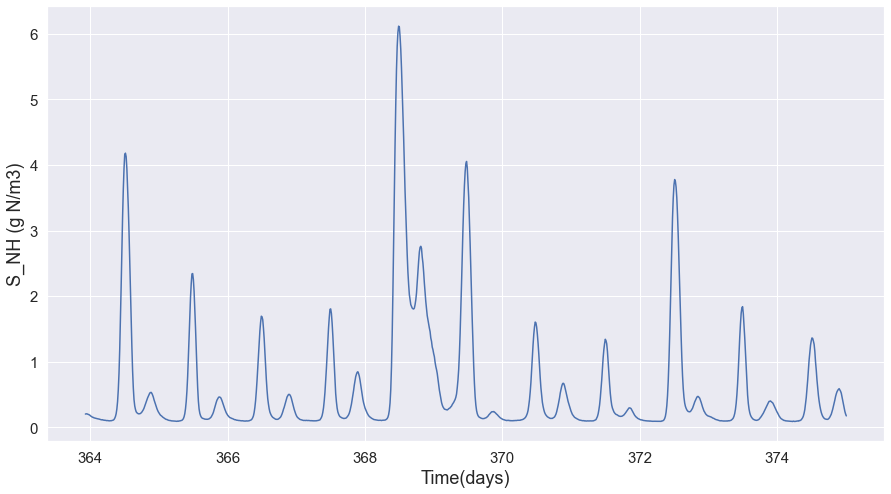

In [17]:
# 10 days for final evaluation
p = sns.lineplot(x="time", y="S_NH_target", data=df_teste_final)
p.set_xlabel("Time(days)", fontsize = 18)
p.set_ylabel("S_NH (g N/m3)", fontsize = 18)
p.tick_params(labelsize=15)

In [18]:
# Copy dataset
df = df_treino.copy()

## Algorithms

### Algorithm 1: Long short-term memory (LSTM)

#### Preparing data for the algorithm

In [19]:
df_for_training = df.filter(['S_NH_target','S_S','X_S','S_O','S_NO','S_NH','S_ND', 'X_ND', 'S_alk', 'TSS'], axis=1)

In [20]:
# Dataset to be used
df_for_training.head()

S_NH_target       S_S        X_S      S_NO      S_NH      S_ND      X_ND  \
0     0.141586  1.268253  57.810141  2.265460  6.981219  0.657996  3.703355   
1     0.123924  1.213295  56.250462  2.451755  6.553976  0.635936  3.633024   
2     0.118337  1.166586  54.871248  2.658756  6.135189  0.620582  3.559093   
3     0.111212  1.128876  53.689564  2.853949  5.767598  0.607559  3.488304   
4     0.106936  1.097790  52.625194  3.028143  5.448274  0.595661  3.422094   

      S_alk          TSS  
0  5.546914  3756.280981  
1  5.503489  3807.713712  
2  5.459704  3853.815714  
3  5.420912  3889.020948  
4  5.387443  3914.593854

In [21]:
# Normalize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)

In [22]:
# Put the data in the format for the LSTM
trainX = []
trainY = []

n_future = 1   # Number of samples to be predicted in the future
n_past = 96  # Number of samples to consider to predict the future

for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (17184, 96, 9).
trainY shape == (17184, 1).


#### Creating the model

In [23]:
# Create the LSTM model with Keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.models import load_model
import tensorflow as tf

In [24]:
def get_model():
    model = Sequential()
    model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
    model.add(LSTM(32, activation='relu', return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(32, activation='relu', return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(trainY.shape[1]))
    model.compile(optimizer='adam', loss='mse')
    return model

modelo = get_model()

modelo.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 96, 64)            18944     
_________________________________________________________________
lstm_1 (LSTM)                (None, 96, 32)            12416     
_________________________________________________________________
dropout (Dropout)            (None, 96, 32)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 39,713
Trainable params: 39,713
Non-trainable params: 0
____________________________________________________

#### Training

In [22]:
# Training the model
#modelo.fit(trainX, trainY, epochs=10, batch_size=16, validation_split=0.1, verbose=1)

In [23]:
# Save trained model
#modelo.save('modelo_1_lstm.h5')

In [25]:
# Load the model
loaded_model = load_model("modelos/modelo_1_lstm.h5")

#### Prepare test data and predictions

In [26]:
# Data for final test
teste_final = df_teste_final.filter(['S_NH_target','S_S','X_S','S_O','S_NO','S_NH','S_ND', 'X_ND', 'S_alk', 'TSS'], axis=1)

In [27]:
# Normalize
scaler = StandardScaler()
scaler = scaler.fit(teste_final)
teste_final_scaled = scaler.transform(teste_final)

In [28]:
# Put the data in the format for the LSTM
train_finalX = []
train_finalY = []

n_future = 1   # Number of samples to be predicted in the future
n_past = 96  # Number of samples to consider to predict the future

for i in range(n_past, len(teste_final_scaled) - n_future +1):
    train_finalX.append(teste_final_scaled[i - n_past:i, 0:df_teste_final.shape[1]])
    train_finalY.append(teste_final_scaled[i + n_future - 1:i + n_future, 0])

train_finalX, train_finalY = np.array(train_finalX), np.array(train_finalY)

print('train_finalX shape == {}.'.format(train_finalX.shape))
print('train_finalY shape == {}.'.format(train_finalY.shape))

train_finalX shape == (969, 96, 9).
train_finalY shape == (969, 1).


#### Results

In [32]:
# Forecasts
previsao = loaded_model.predict(train_finalX)

In [33]:
# Copy scaler dimension to do inverse normalization
prediction_copies = np.repeat(previsao, df_for_training.shape[1], axis=-1)
previsto_LSTM = scaler.inverse_transform(prediction_copies)[:,0] # Predicted value

In [34]:
real_copies = np.repeat(train_finalY, df_for_training.shape[1], axis=-1)
real = scaler.inverse_transform(real_copies)[:,0] # Valor real

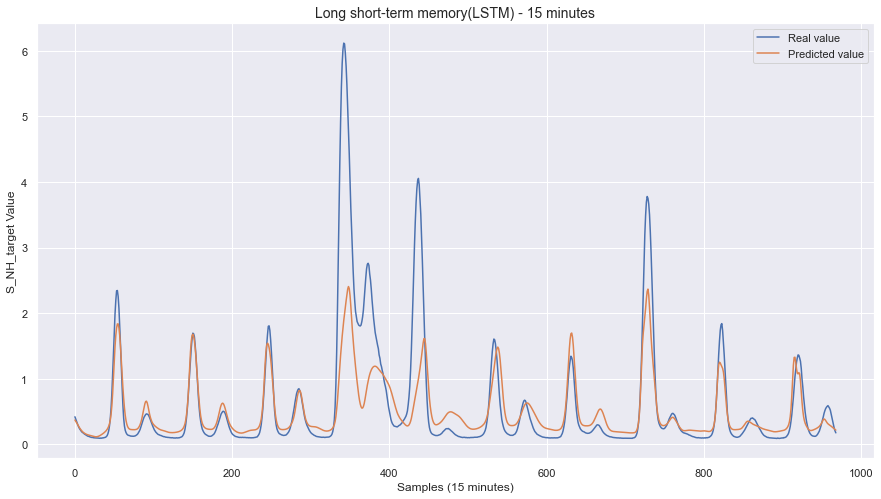

In [35]:
# Graph: actual value and predicted value
plt.figure(figsize = (15, 8))
plt.plot(real)
plt.plot(previsto_LSTM)
plt.title('Long short-term memory(LSTM) - 15 minutes', family='Arial', fontsize=14)
plt.xlabel('Samples (15 minutes)')
plt.ylabel('S_NH_target Value')
plt.legend(['Real value', 'Predicted value'], loc='upper right')

In [36]:
# Evaluation metrics
rmse = tf.keras.metrics.RootMeanSquaredError()
rmse1 = rmse(real, previsto_LSTM).numpy() 
print(rmse1)

0.61593664


In [37]:
mse = tf.keras.losses.MeanSquaredError()
mse1 = mse(real, previsto_LSTM).numpy()
print(mse1)

0.37937793


In [38]:
mae = tf.keras.losses.MeanAbsoluteError()
mae1 = mae(real, previsto_LSTM).numpy()
print(mae1)

0.27327946


In [39]:
mape = tf.keras.losses.MeanAbsolutePercentageError()
mape1 = mape(real, previsto_LSTM).numpy() 
print(mape1)

61.94492


### Algorithm 2: Artificial Neural Network (ANN)

### ANN 1

In [40]:
# Keras specific packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.models import load_model
from keras.utils.vis_utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf # Para métricas de avaliação do modelo

In [41]:
# Create independent(x) and dependent(y) variable columns
df_for_training = df.filter(['S_NH_target','S_S','X_S','S_O','S_NO','S_NH','S_ND', 'X_ND', 'S_alk', 'TSS'], axis=1)
df_ann_x = df_for_training.filter(['S_S','X_S','S_O','S_NO','S_NH','S_ND', 'X_ND', 'S_alk', 'TSS'], axis=1)
df_ann_y = df_for_training.filter(['S_NH_target'], axis=1)

In [42]:
df_ann_x.head()

S_S        X_S      S_NO      S_NH      S_ND      X_ND     S_alk  \
0  1.268253  57.810141  2.265460  6.981219  0.657996  3.703355  5.546914   
1  1.213295  56.250462  2.451755  6.553976  0.635936  3.633024  5.503489   
2  1.166586  54.871248  2.658756  6.135189  0.620582  3.559093  5.459704   
3  1.128876  53.689564  2.853949  5.767598  0.607559  3.488304  5.420912   
4  1.097790  52.625194  3.028143  5.448274  0.595661  3.422094  5.387443   

           TSS  
0  3756.280981  
1  3807.713712  
2  3853.815714  
3  3889.020948  
4  3914.593854

In [43]:
df_ann_y.head()

S_NH_target
0     0.141586
1     0.123924
2     0.118337
3     0.111212
4     0.106936

In [44]:
# Normalize the data
scaler_x = MinMaxScaler(feature_range = (0,1))
scaler_y = MinMaxScaler(feature_range = (0,1))
# Fit the scaler using available training data
input_scaler = scaler_x.fit(df_ann_x)
output_scaler = scaler_y.fit(df_ann_y)
# Apply the scaler to training data
train_y_norm = output_scaler.transform(df_ann_y)
train_x_norm = input_scaler.transform(df_ann_x)

In [45]:
# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(train_x_norm, train_y_norm, test_size=0.30, random_state=40)
print(f'Traning set: x:{X_train.shape}, y:{y_train.shape}')
print(f'Test set: x:{X_test.shape}, y:{y_test.shape}')

Traning set: x:(12096, 8), y:(12096, 1)
Test set: x:(5184, 8), y:(5184, 1)


#### Preparing the model

In [46]:
# Defining model
model = Sequential()
model.add(Dense(500, input_dim=df_ann_x.shape[1], activation= "relu"))
model.add(Dense(100, activation= "relu"))
model.add(Dense(100, activation= "relu"))
model.add(Dense(100, activation= "relu"))
model.add(Dense(1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               4500      
_________________________________________________________________
dense_2 (Dense)              (None, 100)               50100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 101       
Total params: 74,901
Trainable params: 74,901
Non-trainable params: 0
_________________________________________________________________


#### Training

In [39]:
# Compile the model
#model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae'])
#model_ann = model.fit(X_train, y_train, epochs=20)

In [40]:
# Save trained model
#model.save('model_ann_1.h5')

In [47]:
# Load the model
model_ann = load_model("modelos/model_ann_1.h5")

#### Preparing test data for predictions

In [48]:
# Process test data 
# Create independent(x) and dependent(y) variable columns
df_teste_final = df_entrada[35041:36001] # 10 days (holdout sample) for the final test.
df_final_x = df_teste_final.filter(['S_S','X_S','S_O','S_NO','S_NH','S_ND', 'X_ND', 'S_alk', 'TSS'], axis=1)
df_final_y = df_teste_final.filter(['S_NH_target'], axis=1)

In [49]:
print(df_final_x.shape)
print(df_final_y.shape)

(960, 8)
(960, 1)


In [50]:
# Normalizing data from df_final_x
final_x_norm = input_scaler.transform(df_final_x)

#### Results

In [51]:
# Make prediction with trained model
previsao_ann = model_ann.predict(final_x_norm)

In [52]:
# Perform inverse normalization for forecasts
y_previsto = output_scaler.inverse_transform(previsao_ann)

In [53]:
# Create dataframe with real and forecast values
df2 = df_final_y.reset_index()

In [54]:
column_names = ["real", "previsto"]
df3 = pd.DataFrame(columns = column_names)

In [55]:
df3['real'] = df2['S_NH_target'] 
df3['previsto'] = y_previsto 

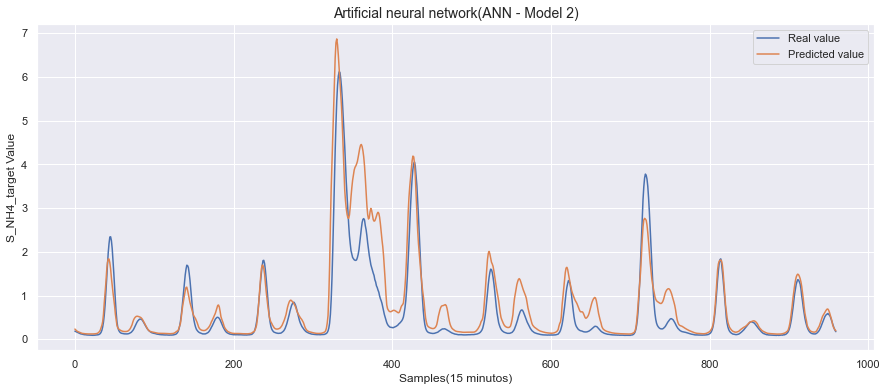

In [56]:
# NH4 Graph
plt.figure(figsize = (15, 6))
plt.plot(df3.real)
plt.plot(df3.previsto)
plt.title('Artificial neural network(ANN - Model 2)', family='Arial', fontsize=14)
plt.xlabel('Samples(15 minutos)')
plt.ylabel('S_NH4_target Value')
plt.legend(['Real value', 'Predicted value'], loc='upper right')

In [57]:
# Evaluation metrics
rmse = tf.keras.metrics.RootMeanSquaredError()
print('RMSE:',rmse(df3.real, df3.previsto).numpy())

mse = tf.keras.losses.MeanSquaredError()
print('MSE:',mse(df3.real, df3.previsto).numpy())

mae = tf.keras.losses.MeanAbsoluteError()
print('MAE:',mae(df3.real, df3.previsto).numpy())

mape = tf.keras.losses.MeanAbsolutePercentageError()
print('MAPE:',mape(df3.real, df3.previsto).numpy())

RMSE: 0.49487624
MSE: 0.2449025
MAE: 0.2713247
MAPE: 61.260025


#### ANN 2

#### Preparing data for the algorithm

In [59]:
# Set model
model = Sequential()
model.add(Dense(500, input_dim=df_ann_x.shape[1], activation= "relu"))
model.add(Dense(100, activation= "relu"))
model.add(Dense(100, activation= "relu"))
model.add(Dense(1))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 500)               4500      
_________________________________________________________________
dense_11 (Dense)             (None, 100)               50100     
_________________________________________________________________
dense_12 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 101       
Total params: 64,801
Trainable params: 64,801
Non-trainable params: 0
_________________________________________________________________


#### Training

In [52]:
# Compile the model
#model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae'])
#model_ann = model.fit(X_train, y_train, epochs=20)

In [53]:
# Saving the trained model 
#model.save('model_ann_2.h5')

In [60]:
# Load the model
model_ann = load_model("modelos/model_ann_2.h5") 

#### Prepare test data for predictions

In [61]:
# Create independent(x) and dependent(y) variable columns
df_teste_final = df_entrada[35041:36001] # 10 dias(holdout sample) for the final test
df_final_x = df_teste_final.filter(['S_S','X_S','S_O','S_NO','S_NH','S_ND', 'X_ND', 'S_alk', 'TSS'], axis=1)
df_final_y = df_teste_final.filter(['S_NH_target'], axis=1)

In [62]:
print(df_final_x.shape)
print(df_final_y.shape)

(960, 8)
(960, 1)


In [63]:
# Normalize data from df_final_x
final_x_norm = input_scaler.transform(df_final_x)

#### Results

In [64]:
# Make prediction with trained model
previsao_ann = model_ann.predict(final_x_norm)

In [65]:
# Perform inverse normalization for forecasts
y_previsto = output_scaler.inverse_transform(previsao_ann)

In [66]:
# Create dataframe with actual and forecast values
df2 = df_final_y.reset_index()

In [67]:
column_names = ["real", "previsto"]
df3 = pd.DataFrame(columns = column_names)

In [68]:
df3['real'] = df2['S_NH_target'] 
df3['previsto'] = y_previsto 

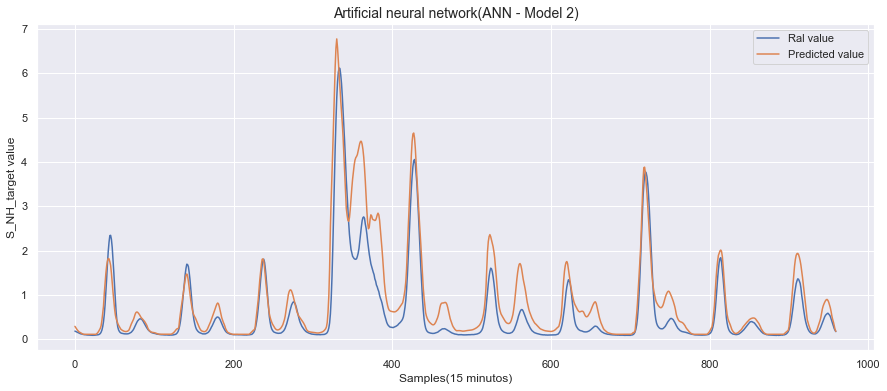

In [69]:
# NH4 Graph
plt.figure(figsize = (15, 6))
plt.plot(df3.real)
plt.plot(df3.previsto)
plt.title('Artificial neural network(ANN - Model 2)', family='Arial', fontsize=14)
plt.xlabel('Samples(15 minutos)')
plt.ylabel('S_NH_target value')
plt.legend(['Ral value', 'Predicted value'], loc='upper right')

In [70]:
# Evaluation metrics
rmse = tf.keras.metrics.RootMeanSquaredError()
print('RMSE:',rmse(df3.real, df3.previsto).numpy())

mse = tf.keras.losses.MeanSquaredError()
print('MSE:',mse(df3.real, df3.previsto).numpy())

mae = tf.keras.losses.MeanAbsoluteError()
print('MAE:',mae(df3.real, df3.previsto).numpy())

mape = tf.keras.losses.MeanAbsolutePercentageError()
print('MAPE:',mape(df3.real, df3.previsto).numpy())

RMSE: 0.48501888
MSE: 0.2352433
MAE: 0.29062158
MAPE: 69.01582


### Algorithm 3: Adaptive neuro-fuzzy inference system (ANFIS)
The model was developed in Matlab.

<img src="figuras/f7.png"> 

In [111]:
df_entrada.head()

time        S_I       S_S          X_I        X_S        X_b,h  \
0  0.010417  28.067023  1.268253  1544.857445  57.810141  2263.844807   
1  0.020833  28.080713  1.213295  1566.626941  56.250462  2295.567404   
2  0.031250  28.104926  1.166586  1586.173348  54.871248  2323.879898   
3  0.041667  28.134986  1.128876  1601.166411  53.689564  2345.443738   
4  0.052083  28.166516  1.097790  1612.142341  52.625194  2361.084431   

        X_b,a          X_p       S_0      S_NO      S_NH      S_ND      X_ND  \
0  167.962940   973.899308  0.000169  2.265460  6.981219  0.657996  3.703355   
1  170.409281   988.097528  0.000152  2.451755  6.553976  0.635936  3.633024   
2  172.609877  1000.886581  0.000157  2.658756  6.135189  0.620582  3.559093   
3  174.303302  1010.758250  0.000158  2.853949  5.767598  0.607559  3.488304   
4  175.548443  1018.058063  0.000151  3.028143  5.448274  0.595661  3.422094   

      S_alk          TSS            fr       temp  S_NH_target  
0  5.546914  3756.280981  97627.650656  14.858490     0.141586  
1  5.503489  3807.713712  97056.068164  14.860318     0.123924  
2  5.459704  3853.815714  96395.567674  14.863169     0.118337  
3  5.420912  3889.020948  95747.265846  14.866241     0.111212  
4  5.387443  3914.593854  95149.331497  14.868961     0.106936

In [112]:
df_entrada.shape

(58464, 18)

In [113]:
df_treino = df_entrada[0:17280] # 180 days for training and testing
df_teste = df_entrada[34936:36001] # 10 days (holdout sample) for final test

In [114]:
# New dataset with selected features
data_treino = df_treino[['S_NH_target','X_S','S_0','S_NH', 'X_ND', 'S_alk']]
data_teste = df_teste[['S_NH_target','X_S','S_0','S_NH', 'X_ND', 'S_alk']]

In [115]:
data_treino.shape

(17280, 6)

In [116]:
data_teste.shape

(1065, 6)

In [117]:
# Export datasets in excel - the model will be made in matlab
# data_treino.to_excel(r'data_treino.xlsx', index = False)
# data_teste.to_excel(r'data_teste.xlsx', index = False)

In [118]:
# Read excel with results 
dataAnfis = pd.ExcelFile('datasets/data_anfis_NH4.xlsx')

In [119]:
# Worksheet names 
dataAnfis.sheet_names

['treino', 'teste', 'teste_final', 'resultado']

In [120]:
# Dataset with results
df_anfis = pd.read_excel(dataAnfis, 'resultado')

In [121]:
df_anfis.head()

S_NH_real  S_NH_previsto
0   0.202761       0.282856
1   0.205492       0.277497
2   0.206269       0.268634
3   0.200984       0.243320
4   0.197433       0.245444

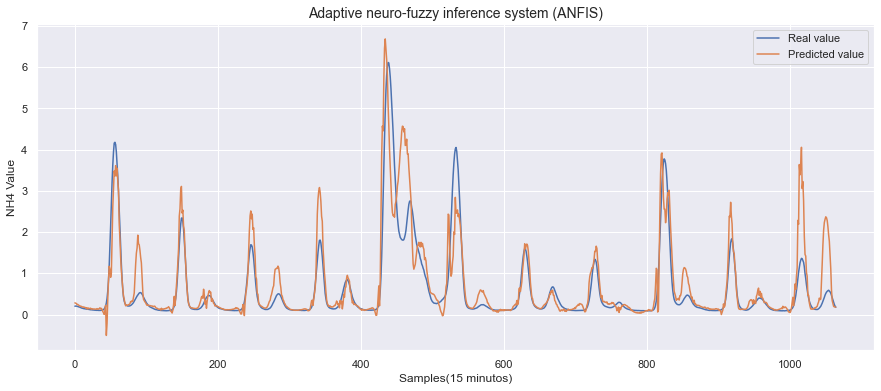

In [122]:
# NH4 Graph
plt.figure(figsize = (15, 6))
plt.plot(df_anfis.S_NH_real)
plt.plot(df_anfis.S_NH_previsto)
plt.title('Adaptive neuro-fuzzy inference system (ANFIS)', family='Arial', fontsize=14)
plt.xlabel('Samples(15 minutos)')
plt.ylabel('NH4 Value') 
plt.legend(['Real value', 'Predicted value'], loc='upper right')


plt.show()

In [82]:
# Evaluation metrics
rmse = tf.keras.metrics.RootMeanSquaredError()
print('RMSE:',rmse(df_anfis.S_NH_real, df_anfis.S_NH_previsto).numpy())

mse = tf.keras.losses.MeanSquaredError()
print('MSE:',mse(df_anfis.S_NH_real, df_anfis.S_NH_previsto).numpy())

mae = tf.keras.losses.MeanAbsoluteError()
print('MAE:',mae(df_anfis.S_NH_real, df_anfis.S_NH_previsto).numpy())

mape = tf.keras.losses.MeanAbsolutePercentageError()
print('MAPE:',mape(df_anfis.S_NH_real, df_anfis.S_NH_previsto).numpy())

RMSE: 0.55005896
MSE: 0.3025648593902588
MAE: 0.26799526810646057
MAPE: 46.214561462402344


### Algorithm 4: Gaussian Mixture Regression

In [ ]:
# Loading libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from gmr.sklearn import GaussianMixtureRegressor
from matplotlib import pyplot
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV,learning_curve
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
import time

#### Prepare data for the algorithm

In [83]:
df_treino = df_treino[['S_NH_target','S_S','X_S','S_NO','S_NH','S_ND', 'X_ND', 'S_alk', 'TSS']]
df_teste_final = df_teste_final[['S_NH_target','S_S','X_S','S_NO','S_NH','S_ND', 'X_ND', 'S_alk', 'TSS']]

In [84]:
df_for_training = df_treino.filter(['S_NH_target','S_S','X_S','S_NO','S_NH','S_ND', 'X_ND', 'S_alk', 'TSS'], axis=1)

In [85]:
df_for_training.head()

S_NH_target       S_S        X_S      S_NO      S_NH      S_ND      X_ND  \
0     0.141586  1.268253  57.810141  2.265460  6.981219  0.657996  3.703355   
1     0.123924  1.213295  56.250462  2.451755  6.553976  0.635936  3.633024   
2     0.118337  1.166586  54.871248  2.658756  6.135189  0.620582  3.559093   
3     0.111212  1.128876  53.689564  2.853949  5.767598  0.607559  3.488304   
4     0.106936  1.097790  52.625194  3.028143  5.448274  0.595661  3.422094   

      S_alk          TSS  
0  5.546914  3756.280981  
1  5.503489  3807.713712  
2  5.459704  3853.815714  
3  5.420912  3889.020948  
4  5.387443  3914.593854

In [86]:
# Create columns of independent (x) and dependent (y) variables
df_gmr_x = df_for_training.filter(['S_S','X_S','S_NO','S_NH','S_ND', 'X_ND', 'S_alk', 'TSS'], axis=1)
df_gmr_y = df_for_training.filter(['S_NH_target'], axis=1)

In [87]:
# Normalize os dados
scaler_x = MinMaxScaler(feature_range = (0,1))
scaler_y = MinMaxScaler(feature_range = (0,1))
# Fit the scaler using available training data
input_scaler = scaler_x.fit(df_gmr_x)
output_scaler = scaler_y.fit(df_gmr_y)
# Apply the scaler to training data
train_x_norm = input_scaler.transform(df_gmr_x)
train_y_norm = output_scaler.transform(df_gmr_y)

In [88]:
# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(train_x_norm, train_y_norm, test_size=0.30, random_state=40)
print(f'Training set: x:{X_train.shape}, y:{y_train.shape}')
print(f'Test set: x:{X_test.shape}, y:{y_test.shape}')

Conjuntos de treino: x:(12096, 8), y:(12096, 1)
Conjuntos de teste: x:(5184, 8), y:(5184, 1)


#### Preparing the model

In [90]:
!pip install gmr

  Created wheel for gmr: filename=gmr-1.6.2-py3-none-any.whl size=17495 sha256=6853e17a054ce8f27ceebe073000ecf2cc7e8517373bb541ab9addad66071965
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\e9\ef\a9\730e1d9c7928011a1c547f641b388d5c02e329f0a532d72bcd
Successfully built gmr


In [ ]:
model = GridSearchCV(
    GaussianMixtureRegressor(n_components=2),param_grid={"n_components": [2,3,4,5,10,15,20,25,30]},
)

In [ ]:
t0 = time.time()
gmr = model.fit(X_train,y_train) # Scaled X_train and y_train
model_fit = time.time() - t0
print("GMR complexity and bandwidth selected and model fitted in %.3f s" % model_fit)

In [ ]:
# Search results for better parameters
gmr.cv_results_

In [ ]:
# Best parameters
gmr.best_estimator_

#### Preparing test data for predictions

In [ ]:
# Create columns of independent (x) and dependent (y) variables
df_final_x = df_teste_final.filter(['S_S','X_S','S_NO','S_NH','S_ND', 'X_ND', 'S_alk', 'TSS'], axis=1)
df_final_y = df_teste_final.filter(['S_NH_target'], axis=1)

In [ ]:
print(df_final_x.shape)
print(df_final_y.shape)

In [ ]:
# Normalize data from df_final_x
final_x_norm = input_scaler.transform(df_final_x)
final_y_norm = output_scaler.transform(df_final_y)

In [ ]:
# Test with the best parameter. It is the same as gmr.best_estimator_.predict(final_x_norm)
y_pred = gmr.predict(final_x_norm) 
y_pred

In [ ]:
np.round(r2_score(final_y_norm,y_pred),2)

#### Results

In [ ]:
# Make prediction with trained model
previsao_gmr = y_pred

In [ ]:
# Perform inverse normalization for forecasts
y_previsto = output_scaler.inverse_transform(previsao_gmr)

In [ ]:
# Create dataframe with actual and forecast values
df2 = df_final_y.reset_index()

In [ ]:
column_names = ["real", "previsto"]
dfNHgmr = pd.DataFrame(columns = column_names)

In [ ]:
dfNHgmr['real'] = df2['S_NH_target'] 
dfNHgmr['previsto'] = y_previsto 

In [ ]:
dfNHgmr.to_csv('dfNHgmr.csv', index=False) 

In [ ]:
# NH4 graph
plt.figure(figsize = (15, 6))
plt.plot(dfNHgmr.real)
plt.plot(dfNHgmr.previsto)
plt.title('Gaussian Mixture Regression', family='Arial', fontsize=14)
plt.xlabel('Samples(15 minutes)')
plt.ylabel('NH4 Value')
plt.legend(['Real value', 'Predicted value'], loc='upper right')

#### Read file with forecasts

In [95]:
df_transformer = pd.read_csv('datasets/previsao_NH4.csv') 

In [96]:
df_transformer.describe()

previsto
count  1065.000000
mean      0.613977
std       0.937817
min       0.089294
25%       0.137583
50%       0.207869
75%       0.543605
max       5.921672

In [97]:
column_names = ["real", "previsto"]
df_trans = pd.DataFrame(columns = column_names)

In [98]:
df_trans.real = df_anfis.S_NH_real

In [99]:
df_trans.previsto = df_transformer.previsto

In [100]:
df_trans.head()

real  previsto
0  0.202761  0.186915
1  0.205492  0.189685
2  0.206269  0.190620
3  0.200984  0.189278
4  0.197433  0.184894

In [101]:
df_trans.shape

(1065, 2)

In [102]:
# Métricas de avaliação
rmse = tf.keras.metrics.RootMeanSquaredError()
print('RMSE:',rmse(df_trans.real, df_trans.previsto).numpy())

mse = tf.keras.losses.MeanSquaredError()
print('MSE:',mse(df_trans.real, df_trans.previsto).numpy())

mae = tf.keras.losses.MeanAbsoluteError()
print('MAE:',mae(df_trans.real, df_trans.previsto).numpy())

mape = tf.keras.losses.MeanAbsolutePercentageError()
print('MAPE:',mape(df_trans.real, df_trans.previsto).numpy())

RMSE: 0.051543143
MSE: 0.0026566949672997
MAE: 0.030318357050418854
MAPE: 8.895302772521973


#### GRM Forecast

In [103]:
# Carregar dados
dfGRM = pd.read_csv('datasets/dfNHgmr.csv')
dfGRM.head() 

real  previsto
0  0.202761  0.392626
1  0.205492  0.393721
2  0.206269  0.391393
3  0.200984  0.385268
4  0.197433  0.375237

In [104]:
# Métricas de avaliação
rmse = tf.keras.metrics.RootMeanSquaredError()
print('RMSE:',rmse(dfGRM.real, dfGRM.previsto).numpy())

mse = tf.keras.losses.MeanSquaredError()
print('MSE:',mse(dfGRM.real, dfGRM.previsto).numpy())

mae = tf.keras.losses.MeanAbsoluteError()
print('MAE:',mae(dfGRM.real, dfGRM.previsto).numpy())

mape = tf.keras.losses.MeanAbsolutePercentageError()
print('MAPE:',mape(dfGRM.real, dfGRM.previsto).numpy())

RMSE: 0.75378144
MSE: 0.5681865215301514
MAE: 0.46518000960350037
MAPE: 184.6240997314453


### Algorithm 5: Transformers

The Transformers algorithm was completely developed in a separate notebook. Here are the prediction results. If you have any questions, just look in the attached notebook.

In [106]:
df_transformer = pd.read_csv('datasets/previsao_NH4.csv') 

In [107]:
df_transformer.head()

previsto
0  0.186915
1  0.189685
2  0.190620
3  0.189278
4  0.184894

In [108]:
df_transformer.columns

Index(['previsto'], dtype='object')

In [109]:
column_names = ["real", "previsto"]
df_trans = pd.DataFrame(columns = column_names)

In [125]:
df_trans.real = df_anfis.S_NH_real

In [126]:
df_trans.previsto = df_transformer.previsto

In [127]:
df_trans.head()

real  previsto
0  0.202761  0.186915
1  0.205492  0.189685
2  0.206269  0.190620
3  0.200984  0.189278
4  0.197433  0.184894

In [128]:
df_trans.shape

(1065, 2)

#### Results

In [129]:
# Métricas de avaliação
rmse = tf.keras.metrics.RootMeanSquaredError()
print('RMSE:',rmse(df_trans.real, df_trans.previsto).numpy())

mse = tf.keras.losses.MeanSquaredError()
print('MSE:',mse(df_trans.real, df_trans.previsto).numpy())

mae = tf.keras.losses.MeanAbsoluteError()
print('MAE:',mae(df_trans.real, df_trans.previsto).numpy())

mape = tf.keras.losses.MeanAbsolutePercentageError()
print('MAPE:',mape(df_trans.real, df_trans.previsto).numpy())

RMSE: 0.051543143
MSE: 0.0026566949672997
MAE: 0.030318357050418854
MAPE: 8.895302772521973


# Comparação LSTM x ANN x ANFIS

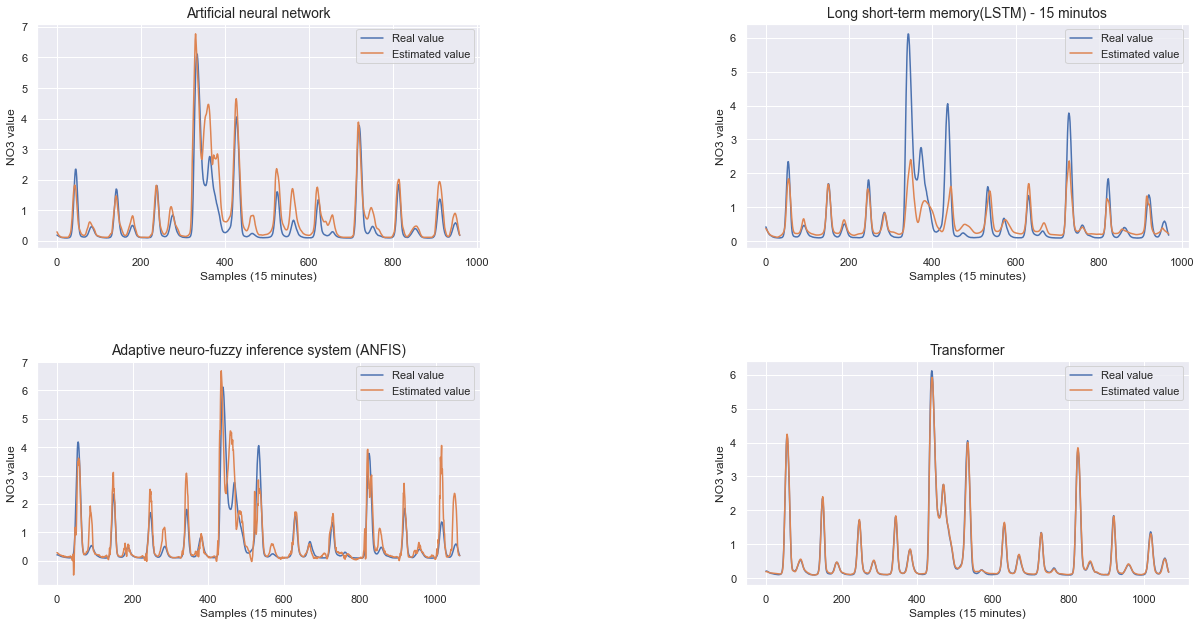

In [131]:
plt.figure(figsize = (20, 10))

plt.subplot(2, 2, 1)
plt.plot(df3.real)
plt.plot(df3.previsto)
plt.title('Artificial neural network', family='Arial', fontsize=14)
plt.xlabel('Samples (15 minutes)')
plt.ylabel('NO3 value')
plt.legend(['Real value', 'Estimated value'], loc='upper right')


plt.subplot(2, 2, 2)
plt.plot(real)
plt.plot(previsto_LSTM)
plt.title('Long short-term memory(LSTM) - 15 minutos', family='Arial', fontsize=14)
plt.xlabel('Samples (15 minutes)')
plt.ylabel('NO3 value')
plt.legend(['Real value', 'Estimated value'], loc='upper right')



plt.subplot(2, 2, 3)
plt.plot(df_anfis.S_NH_real)
plt.plot(df_anfis.S_NH_previsto) 
plt.title('Adaptive neuro-fuzzy inference system (ANFIS)', family='Arial', fontsize=14)
plt.xlabel('Samples (15 minutes)')
plt.ylabel('NO3 value')
plt.legend(['Real value', 'Estimated value'], loc='upper right')



plt.subplot(2, 2, 4)
plt.plot(df_trans.real)
plt.plot(df_trans.previsto)
plt.title('Transformer', family='Arial', fontsize=14)
plt.xlabel('Samples (15 minutes)')
plt.ylabel('NO3 value')
plt.legend(['Real value', 'Estimated value'], loc='upper right')




plt.subplots_adjust(left=0.2,
                    bottom=0.12, 
                    right=1, 
                    top=0.9, 
                    wspace=0.6, 
                    hspace=0.5)

plt.show()

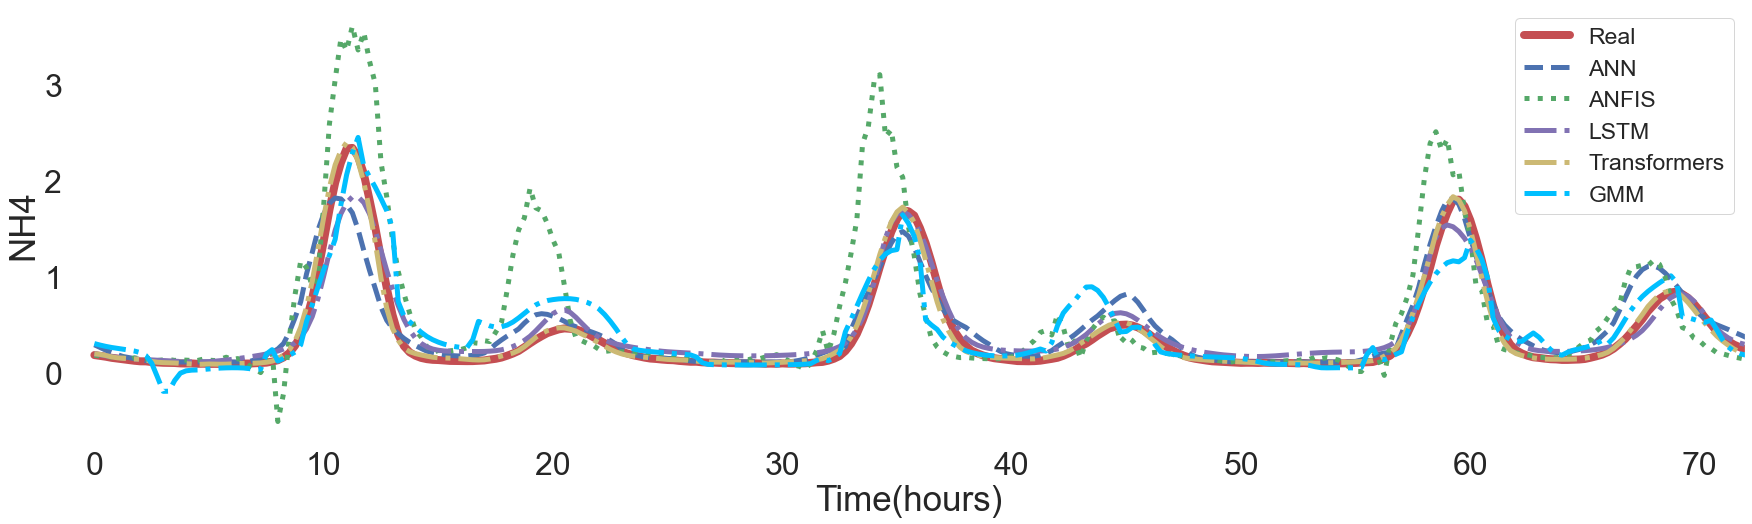

In [90]:
x_axis = np.arange(0,72.5,0.25) # Valores para o eixo x
plt.figure(figsize = (30, 8))
plt.plot(x_axis,df3.real.iloc[0:290],'r', linewidth=8)   
plt.plot(x_axis,df3.previsto.iloc[0:290], 'b', linestyle='--', linewidth=5) 
plt.plot(x_axis,df_anfis.S_NH_previsto.iloc[12:302], 'g', linestyle=':', linewidth=5) 
plt.plot(x_axis,previsto_LSTM[9:299],'m', linestyle='-.', linewidth=5) 

plt.plot(x_axis,df_trans.previsto[106:396],'y', linestyle='-.', linewidth=5)

plt.plot(x_axis,dfGRM.previsto.iloc[9:299],'deepskyblue', linestyle='-.', linewidth=5)


plt.legend(['Real','ANN', 'ANFIS','LSTM', 'Transformers','GMM'], fontsize=23)
#plt.title('NH4 - forecast for the first day', fontsize=20)
plt.xlim([-1, 72])
plt.xlabel('Time(hours)', fontsize=35)
plt.ylabel('NH4', fontsize=35)
plt.xticks(fontsize=32)
plt.yticks(fontsize=32)  

plt.rcParams['axes.facecolor'] = 'white'

plt.savefig('NH_junto1.pdf', dpi=800, format='pdf', bbox_inches='tight')
plt.show()

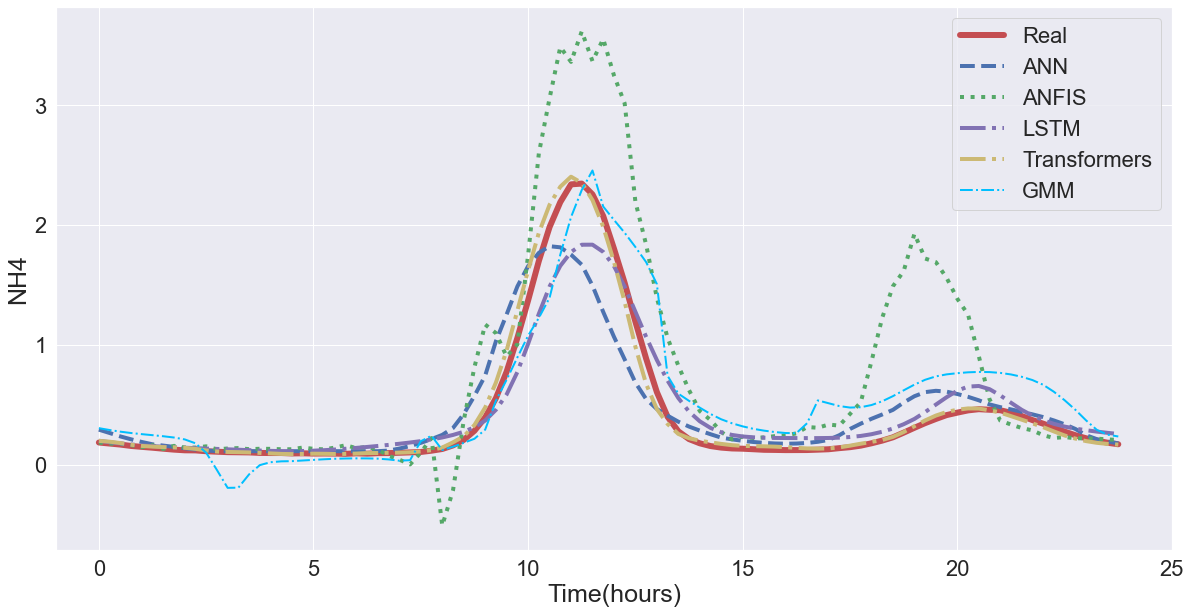

In [144]:
x_axis = np.arange(0,24,0.25) # Valores para o eixo x
plt.figure(figsize = (20, 10))
plt.plot(x_axis,df3.real.iloc[0:96],'r', linewidth=6)   
plt.plot(x_axis,df3.previsto.iloc[0:96], 'b', linestyle='--', linewidth=4) 
plt.plot(x_axis,df_anfis.S_NH_previsto.iloc[12:108], 'g', linestyle=':', linewidth=4) 
plt.plot(x_axis,previsto_LSTM[9:105],'m', linestyle='-.', linewidth=4) 

plt.plot(x_axis,df_trans.previsto[106:202],'y', linestyle='-.', linewidth=4)

plt.plot(x_axis,dfGRM.previsto.iloc[9:105],'deepskyblue', linestyle='-.', linewidth=2)


plt.legend(['Real','ANN', 'ANFIS','LSTM', 'Transformers','GMM'], fontsize=22)
#plt.title('NH4 - forecast for the first day', fontsize=20)
plt.xlim([-1, 25])
plt.xlabel('Time(hours)', fontsize=25)
plt.ylabel('NH4', fontsize=25)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)  
plt.savefig('NH1day.pdf', dpi=500, format='pdf', bbox_inches='tight')
plt.show()

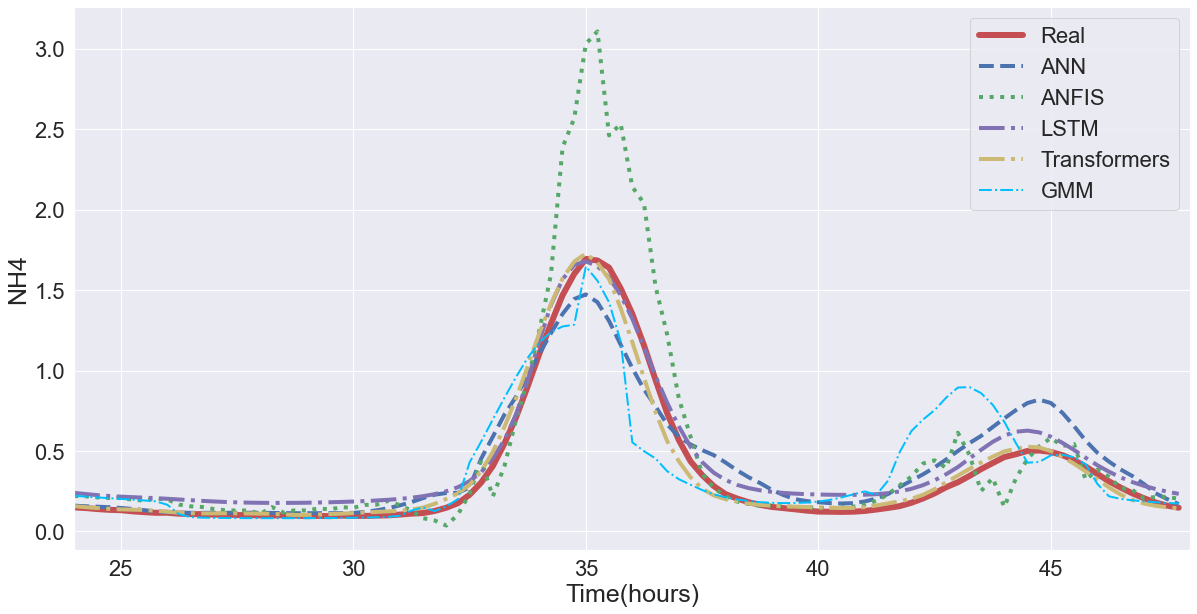

In [145]:
x_axis = np.arange(24,48,0.25) # Valores para o eixo x
plt.figure(figsize = (20, 10))
plt.plot(x_axis,df3.real.iloc[97:193],'r', linewidth=6)   
plt.plot(x_axis,df3.previsto.iloc[97:193], 'b', linestyle='--', linewidth=4) 
plt.plot(x_axis,df_anfis.S_NH_previsto.iloc[104:200], 'g', linestyle=':', linewidth=4) 
plt.plot(x_axis,previsto_LSTM[106:202],'m', linestyle='-.', linewidth=4) 

plt.plot(x_axis,df_trans.previsto[203:299],'y', linestyle='-.', linewidth=4)

plt.plot(x_axis,dfGRM.previsto.iloc[106:202],'deepskyblue', linestyle='-.', linewidth=2)


plt.legend(['Real','ANN', 'ANFIS','LSTM', 'Transformers','GMM'], fontsize=22)
#plt.title('NH4 - forecast for the second day', fontsize=20)
plt.xlim([24, 48])
plt.xlabel('Time(hours)', fontsize=25)
plt.ylabel('NH4', fontsize=25)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22) 
plt.savefig('NH2day.pdf', dpi=500, format='pdf', bbox_inches='tight')
plt.show()

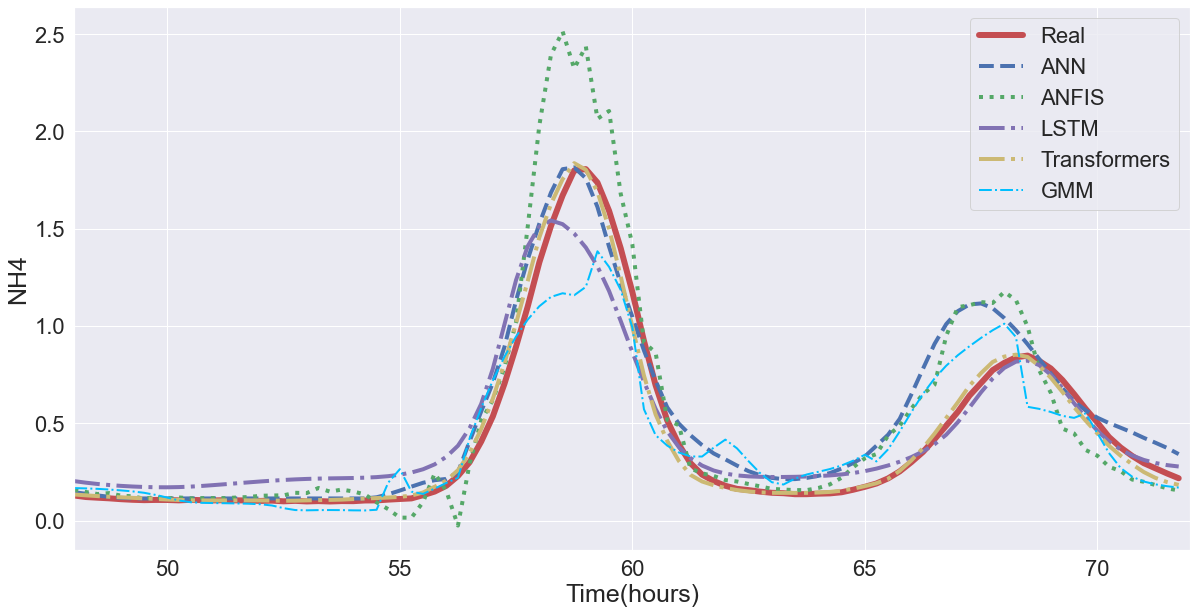

In [146]:
x_axis = np.arange(48,72,0.25) # Valores para o eixo x
plt.figure(figsize = (20, 10))
plt.plot(x_axis,df3.real.iloc[194:290],'r', linewidth=6)   
plt.plot(x_axis,df3.previsto.iloc[194:290], 'b', linestyle='--', linewidth=4) 
plt.plot(x_axis,df_anfis.S_NH_previsto.iloc[204:300], 'g', linestyle=':', linewidth=4) 
plt.plot(x_axis,previsto_LSTM[204:300],'m', linestyle='-.', linewidth=4) 

plt.plot(x_axis,df_trans.previsto[300:396],'y', linestyle='-.', linewidth=4)

plt.plot(x_axis,dfGRM.previsto.iloc[204:300],'deepskyblue', linestyle='-.', linewidth=2)

plt.legend(['Real','ANN', 'ANFIS','LSTM', 'Transformers','GMM'], fontsize=22)
#plt.title('NH4 - forecast for the third day', fontsize=20)
plt.xlim([48, 72])
plt.xlabel('Time(hours)', fontsize=25)
plt.ylabel('NH4', fontsize=25)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.savefig('NH3day.pdf', dpi=500, format='pdf', bbox_inches='tight')
plt.show()